## Statistics Practical Implementation
### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [ ]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [ ]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [ ]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [ ]:
import statistics
statistics.mode(ages)

32

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


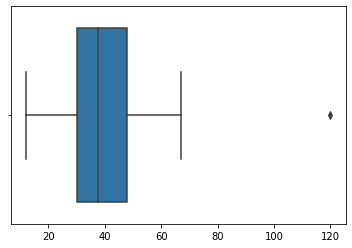

In [ ]:
import seaborn as sns
sns.boxplot(ages)

## 5 Number Summary

In [ ]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [ ]:
print(q1,q3)

30.0 47.75


In [ ]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


## Measure Of Dispersion

1. Variance
2. Standard Deviation

In [ ]:
statistics.variance(ages)

795.2954545454545

In [ ]:
np.var(ages,axis=0)

729.0208333333334

In [ ]:
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance



In [ ]:
variance(ages)

795.2954545454545

In [ ]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance


In [ ]:
variance(ages,dof=1)

795.2954545454545

In [ ]:
statistics.pvariance(ages)

729.0208333333334

In [ ]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

## Histograms And PDF

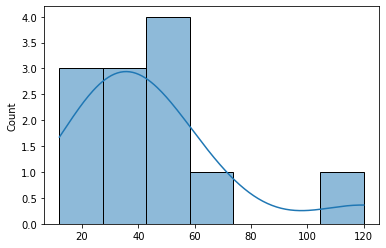

In [ ]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


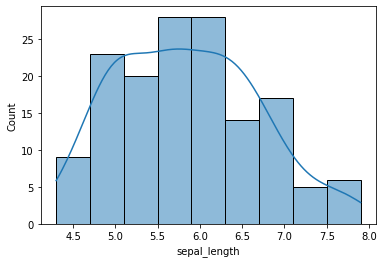

In [ ]:
sns.histplot(df['sepal_length'],kde=True)

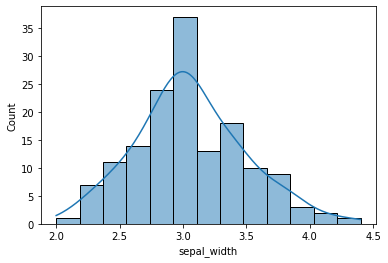

In [ ]:
sns.histplot(df['sepal_width'],kde=True)

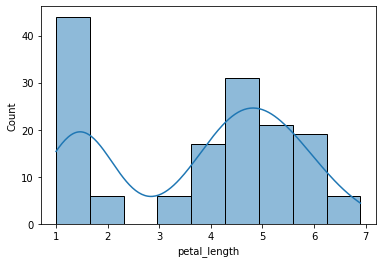

In [ ]:
sns.histplot(df['petal_length'],kde=True)

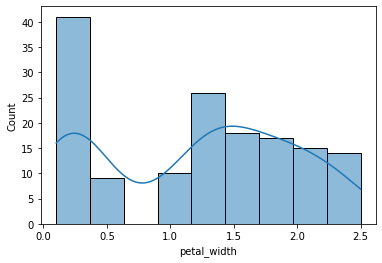

In [ ]:
sns.histplot(df['petal_width'],kde=True)

In [ ]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)

In [ ]:
s

array([ 0.57322123,  0.31347276,  0.18009811,  0.40589072,  0.4065757 ,
        0.4936243 ,  0.49728527,  0.12153091,  0.30262996,  0.31990777,
        0.36760375,  0.25358541,  0.20597053,  0.40523501,  0.67333329,
        0.91048761,  0.90965105,  0.42709146,  0.58810922,  0.4681445 ,
        0.70859298,  0.37931553,  0.46029616,  0.65315614,  0.61590935,
        0.3769359 ,  0.36849874,  0.53575888,  0.81138937,  0.37696639,
        0.19921841,  0.73992463,  0.55719939,  0.44373447,  0.72692332,
        0.31407761,  0.46396172,  0.51190435,  0.34950472,  0.64101915,
        0.44721299,  0.71154915,  0.25071745,  0.09091488,  0.12127463,
        0.24794534,  0.6685801 ,  0.71778387,  0.58173731,  0.55946739,
        0.87581295,  1.02216119,  0.45165612,  0.35690316, -0.01661778,
        0.28438316,  0.68872477,  0.5818103 ,  0.3509174 ,  0.78705377,
        0.67126128,  0.56377266,  0.49133077,  0.11985507,  0.61499736,
        0.7715701 ,  0.54130488,  0.4709847 ,  0.46531144,  0.64

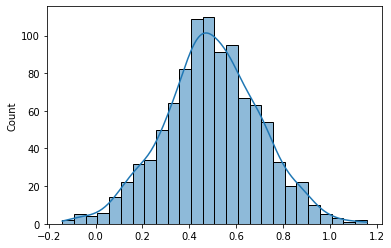

In [ ]:
sns.histplot(s,kde=True)

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [ ]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

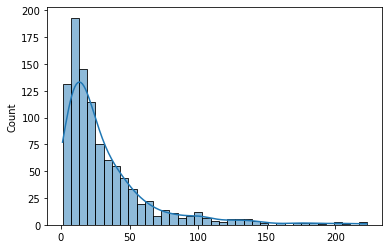

In [ ]:
sns.histplot(s,kde=True)

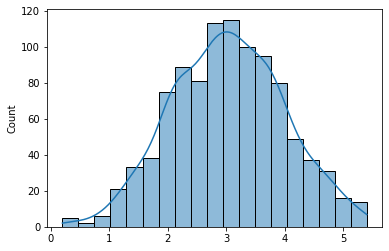

In [ ]:
sns.histplot(np.log(s),kde=True)

## Check whether Disstribution is Normal Distribution

In [ ]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


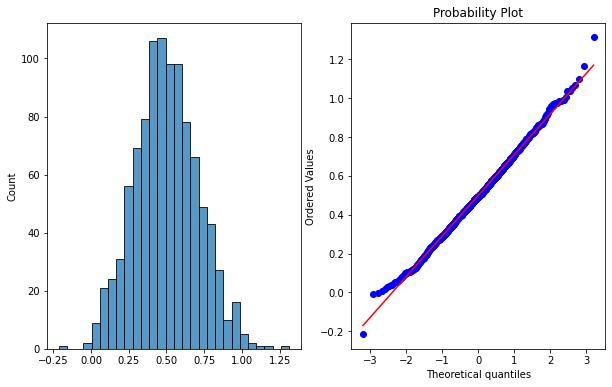

In [ ]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

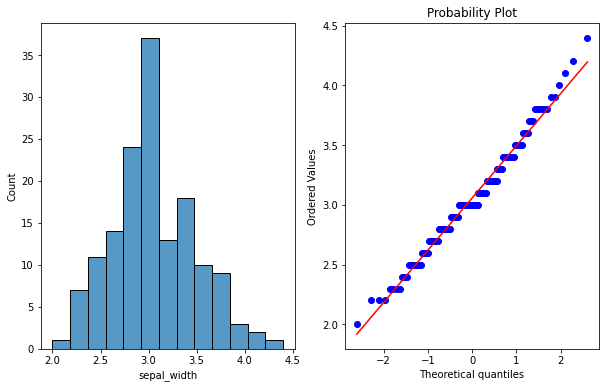

In [ ]:
plot_data(df['sepal_width'])

In [ ]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [ ]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

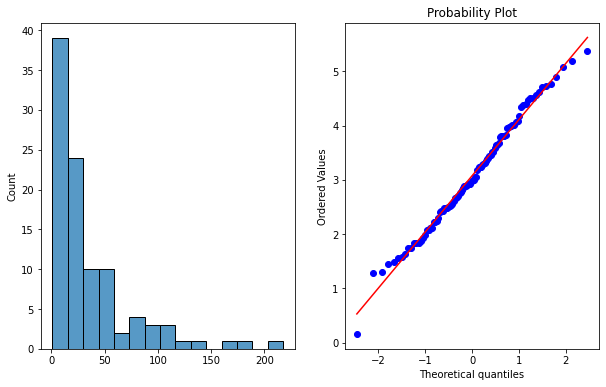

In [ ]:
plot_data_log(sample)

##Pearson and Sperman Rank Correlation

In [ ]:
df=sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
import pandas as pd

In [ ]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


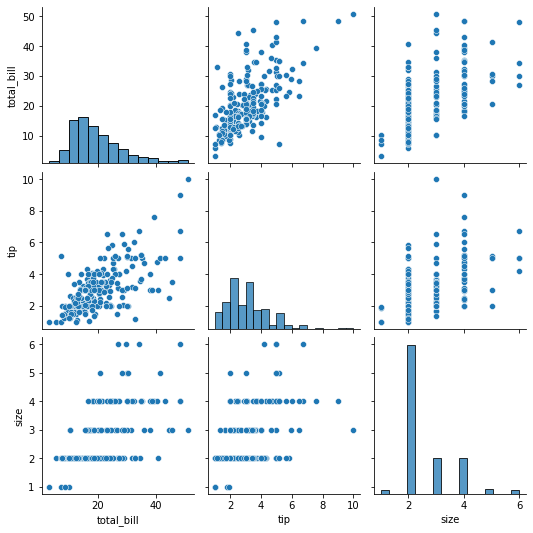

In [ ]:
sns.pairplot(df)